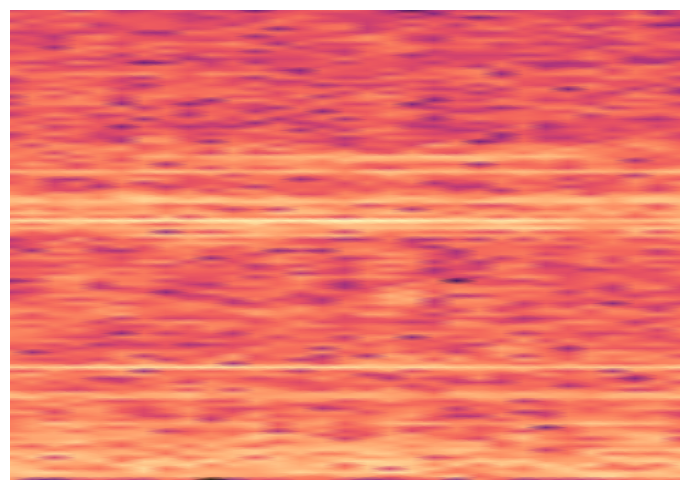

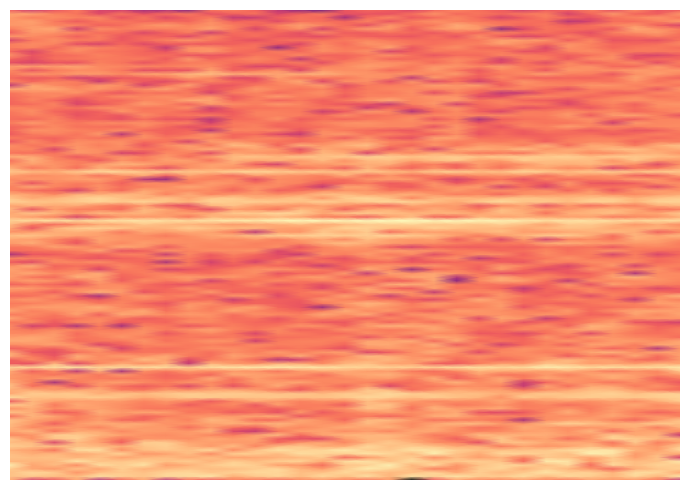

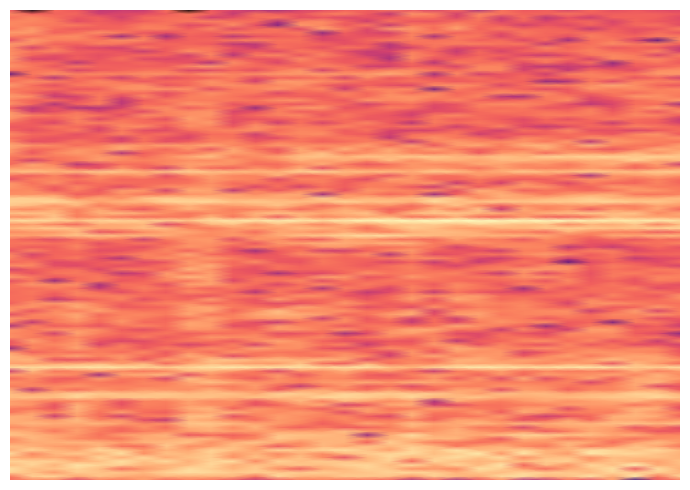

In [58]:
import numpy as np
import pandas as pd
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file_path = "data/STFMK-20201105-LW15-2055_20201125_163921_004.csv"
# CSV 파일 불러오기
data = pd.read_csv(csv_file_path)

# 주파수 데이터 추출
frequencies = data['y'].values

# 샘플링 주파수 설정
sampling_freq = 1000  # 샘플링 주파수 (예: 1000 Hz)

# 데이터를 세 개의 등분으로 나누기
num_segments = 3
segment_length = len(frequencies) // num_segments

# 각 세그먼트에 대한 스펙트로그램 계산 및 시각화
for i in range(num_segments):
    start_idx = i * segment_length
    end_idx = (i + 1) * segment_length

    # STFT 계산
    window_size = 250  # 변경하고자 하는 윈도우 크기
    segment_freq = frequencies[start_idx:end_idx]
    f, t, Sxx = spectrogram(segment_freq, fs=sampling_freq, nperseg=window_size, noverlap=window_size // 2)
  
    # Specify the colormap
    custom_cmap = 'magma'  # You can choose any other colormap from Matplotlib's available colormaps
    plt.figure(figsize=(7, 5))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap=custom_cmap)
    # plt.title(f'Spectrogram of Frequency Data (Segment {i+1})')
    # plt.xlabel('Time [s]')
    # plt.ylabel('Frequency [Hz]')
    # plt.colorbar(label='Intensity [dB]')
    plt.ylim(0, 500)  # 주파수 범위 설정 (예: 0 ~ 500 Hz)

    # Remove axis labels and ticks
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [50]:
import numpy as np
import pandas as pd
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file_path = "data/STFMK-20201105-LW15-2055_20201125_163921_004.csv"
# CSV 파일 불러오기
data = pd.read_csv(csv_file_path)

# 주파수 데이터 추출
frequencies = data['y'].values

# 샘플링 주파수 설정
sampling_freq = 1000  # 샘플링 주파수 (예: 1000 Hz)

# 데이터를 세 개의 등분으로 나누기
num_segments = 3
segment_length = len(frequencies) // num_segments

# 각 세그먼트에 대한 스펙트로그램 계산 및 시각화
for i in range(num_segments):
    start_idx = i * segment_length
    end_idx = (i + 1) * segment_length

    # STFT 계산
    window_size = 250  # 변경하고자 하는 윈도우 크기
    segment_freq = frequencies[start_idx:end_idx]
    f, t, Sxx = spectrogram(segment_freq, fs=sampling_freq, nperseg=window_size, noverlap=window_size // 2)
  
    # Specify the colormap
    custom_cmap = 'magma'  # You can choose any other colormap from Matplotlib's available colormaps
    plt.figure(figsize=(7, 5))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap=custom_cmap)
    # plt.title(f'Spectrogram of Frequency Data (Segment {i+1})')
    # plt.xlabel('Time [s]')
    # plt.ylabel('Frequency [Hz]')
    # plt.colorbar(label='Intensity [dB]')
    plt.ylim(0, 500)  # 주파수 범위 설정 (예: 0 ~ 500 Hz)

    # Remove axis labels and ticks
    plt.axis('off')

    plt.tight_layout()
    # 이미지를 파일로 저장
    plt.savefig(f'spectrogram_segment_{i+1}.png', bbox_inches='tight', pad_inches=0)
    plt.close()  # 이미지를 파일로 저장하고 메모리에서 제거

print("Images saved successfully.")

Images saved successfully.


In [52]:
import os
import numpy as np
import pandas as pd
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# 입력 폴더와 출력 폴더 경로 설정
input_folder = "data"
output_folder = "output_folder"

# 출력 폴더가 없는 경우 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
# 입력 폴더에 있는 모든 CSV 파일 가져오기
csv_files = [file for file in os.listdir(input_folder) if file.endswith('.csv')]

# 샘플링 주파수 설정
sampling_freq = 1000  # 샘플링 주파수 (예: 1000 Hz)

# 데이터를 세 개의 등분으로 나누기
num_segments = 3

# 각 CSV 파일에 대해 처리
for csv_file in csv_files:
    # CSV 파일 경로 설정
    csv_file_path = os.path.join(input_folder, csv_file)
    
    # CSV 파일 불러오기
    data = pd.read_csv(csv_file_path)

    # 주파수 데이터 추출
    frequencies = data['y'].values
    
    # 세그먼트 길이 계산
    segment_length = len(frequencies) // num_segments

    # 각 세그먼트에 대한 스펙트로그램 계산 및 시각화
    for i in range(num_segments):
        start_idx = i * segment_length
        end_idx = (i + 1) * segment_length

        # STFT 계산
        window_size = 250  # 변경하고자 하는 윈도우 크기
        segment_freq = frequencies[start_idx:end_idx]
        f, t, Sxx = spectrogram(segment_freq, fs=sampling_freq, nperseg=window_size, noverlap=window_size // 2)

        # Specify the colormap
        custom_cmap = 'magma'  # You can choose any other colormap from Matplotlib's available colormaps
        plt.figure(figsize=(7, 5))
        plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap=custom_cmap)
        plt.ylim(0, 500)  # 주파수 범위 설정 (예: 0 ~ 500 Hz)

        # Remove axis labels and ticks
        plt.axis('off')

        plt.tight_layout()
        
#         # 이미지를 파일로 저장
#         output_file_name = f"{os.path.splitext(csv_file)[0]}_segment_{i+1}.png"
#         output_file_path = os.path.join(output_folder, output_file_name)
#         plt.savefig(output_file_path, bbox_inches='tight', pad_inches=0)
#         plt.close()  # 이미지를 파일로 저장하고 메모리에서 제거

# print("Images saved successfully.")

Images saved successfully.
